In [17]:
import wikipedia
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
## Machine Learning libraries
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

In [8]:
keywords = [
    "Military Strategy", "Warfare Tactics", "Intelligence", "Diplomacy", "Alliances", "Technology in Warfare",
    "Resource Allocation", "Economic Warfare", "Logistics", "Manpower", "Military Training", "Defense Infrastructure",
    "Psychological Warfare", "Propaganda", "Mobilization", "Guerrilla Warfare", "Counterinsurgency", "Cyber Warfare",
    "Nuclear Strategies", "Naval Warfare", "Aerial Warfare", "Espionage", "Sanctions", "Global Supply Chains",
    "Medicine in Warfare", "Veteran Support", "Civilian Protection", "Humanitarian Assistance", "Refugee Crisis",
    "Post-war Reconstruction", "War Crimes", "International Laws in Warfare", "Peacekeeping", "Conflict Resolution",
    "Military Budget", "Military Recruitment", "Innovative Defense Technologies", "Geopolitical Strategies",
    "Military Intelligence", "Tactical Innovations", "Homeland Security", "Civil-Military Relations", "Political Warfare",
    "Ethics in Warfare", "Post-war Economies", "Demographic Challenges", "Cultural Impacts of War", "Rehabilitation",
    "International Cooperation in Warfare", "Weaponry Advancements", "Battlefield Communication", "Fortifications",
    "Amphibious Warfare", "Chemical and Biological Warfare", "Precision Warfare", "Military Alliances", "Defense Pacts",
    "Historical Warfare Lessons", "Military Command and Control", "Military Drills and Exercises", "War Simulations",
    "Military Education and Training", "Defense Industries", "War Financing", "War Bonds", "Military Logistics and Supply",
    "War and Environment", "Urban Warfare", "Insurgency and Terrorism", "Special Operations", "Commando Operations",
    "Military Courts and Justice", "Rules of Engagement", "War and Society", "Women in Warfare", "Child Soldiers",
    "Displacement and Migration due to War", "Post-Traumatic Stress Disorder (PTSD)", "Reintegration of Soldiers",
    "Peace Treaties", "Post-war Governance", "War Memorials and Remembrance", "Anti-war Movements", "Military Ethics",
    "Military Innovations", "Defensive and Offensive Strategies", "Information Warfare", "Military Contractors",
    "Military Bases and Installations", "Unified Combatant Commands", "War Reserves", "Military Diplomacy",
    "War Games and Simulations", "Crisis Management", "Hostage Rescue", "Military Support to Civil Authorities",
    "Military Laws and Regulations", "War and Technology", "Military Operational Planning", "Strategic Defense Analysis"
]

# You can use this list to search, tag, categorize, or analyze texts related to warfare.


In [9]:
keywords = [
    "Ukrainian War Strategy", "Ukrainian Military Tactics", "Ukrainian War Diplomacy", "Ukrainian War Alliances",
    "Ukrainian War Intelligence", "Ukrainian War Economic Impact", "Ukrainian War Sanctions", "Ukrainian War Logistics",
    "Ukrainian Refugee Crisis", "Ukrainian War Civilian Impact", "Ukrainian Post-war Reconstruction",
    "Ukrainian War Veteran Support", "Ukrainian War Humanitarian Aid", "Post-war Ukraine Demographics",
    "Post-war Ukraine Economic Recovery", "Post-war Ukraine Governance", "Post-war Ukraine Society Rehabilitation",
    "Ukrainian War Historical Lessons", "Ukrainian War International Laws", "Ukraine War Crimes", "Ukrainian Peacekeeping",
    "Ukraine NATO Relations", "Ukrainian War Cybersecurity", "Ukrainian War Propaganda", "Ukrainian Military Training",
    "Ukraine Russia Relations", "Ukrainian War Conflict Resolution", "Ukrainian War Peace Treaties", "Ukraine EU Relations",
    "Ukrainian War Political Impact", "Ukraine Post-war Education", "Ukraine War Cultural Impact", "Ukrainian War Memorials",
    "Ukrainian War Child Soldiers", "Ukrainian War Women’s Role", "Post-war Ukraine Mental Health", "Ukrainian War Healthcare",
    "Ukrainian War Environment Impact", "Ukraine War Resilience", "Ukraine War Adaptation Strategies",
    "Ukrainian War Lessons from Yugoslavia", "Ukrainian War Lessons from Syria", "Ukrainian War Lessons from Afghanistan",
    "Ukrainian War Lessons from Iraq", "Ukrainian War Lessons from Vietnam", "Ukraine Post-war International Support",
    "Ukrainian War Lessons from Georgia", "Ukraine Conflict Post-war Scenarios", "Ukraine War Urban Challenges",
    "Ukraine War Rural Challenges", "Ukraine War Infrastructure", "Ukraine War Energy Sector", "Ukraine War Industry Impact",
    "Ukraine War Technological Advancements", "Ukraine War Innovation", "Ukraine Post-war Investment",
    "Ukraine War Security Sector Reform", "Ukraine War and Global Politics", "Ukraine War Displacement",
    "Ukraine War Migration", "Ukraine War Border Security", "Ukraine War and NATO", "Ukraine War and EU",
    "Ukraine War International Solidarity", "Ukraine War Crisis Management", "Ukraine War Civil Society",
    "Ukraine War Community Resilience", "Ukraine War Education Challenges", "Ukraine War and International Media",
    "Ukraine War Narratives", "Ukraine War and Disinformation", "Ukraine War Legal Challenges", "Ukraine War Justice",
    "Ukraine War Reconciliation Processes", "Ukraine War and Human Rights", "Ukraine War and Regional Stability",
    "Ukraine War Economic Resilience", "Ukraine War and Sustainable Development", "Ukraine War and UN",
    "Ukraine War Geopolitical Impact", "Ukraine War and Baltic States", "Ukraine War and Eastern Europe",
    "Ukraine War and Central Europe", "Ukraine War and Western Support", "Ukraine War Military Equipment",
    "Ukraine War Volunteer Movements", "Ukraine War Resistance", "Ukraine War Evacuation", "Ukraine War Preparedness",
    "Ukraine War Long-term Impacts", "Ukraine War and Global Economy", "Ukraine War and Cyber Warfare",
    "Ukraine War and Information Warfare", "Ukraine War and Psychological Operations"
]

# You can use this list to conduct thorough research on the Ukrainian war and its post-war demographic challenges and solutions.

In [ ]:
pages = set()

for word in keywords:
    pages.update(wikipedia.search(word))

pages

In [5]:
def parse_page(page: str):
    try:
        content = wikipedia.page(page)
        return content.url, content.title, content.summary, content.content
    except:
        return (None, None, None, None)

In [13]:
def is_exists(text: str, key_text: str) -> int:
    tags = re.split(r'[`\-=~!@#$%^&*()_+\[\]{};\'\\:"|<,./<>?\s\t]', key_text)

    for tag in tags:
        if len(tag) == 1 and not re.search(f'{tag}', text): # \b denotes a word boundary
            return 0

        if  re.search(f'{tag}', text, re.IGNORECASE):
            return 1

    return 0

In [ ]:
columns = ["url", "title", "summary", "content"]
data = [parse_page(page) for page in pages]  # Using list comprehension instead of generator expression

wiki_df = pd.DataFrame(
    data=data,
    columns=columns
)

wiki_df.head(5)

In [ ]:
wiki_df.to_json("../output/wiki_pages_data.json", orient="records")

In [10]:
results = pd.read_json("../output/wiki_pages_data.json", orient="records")

In [11]:
conflict_and_security = {
    'Peacebuilding': [],
    'De-escalation': [],
    'Reconciliation': [],
    'Security Reforms': [],
    'Demilitarization': [],
    'Veteran Rehabilitation': [],
    'Human Rights': [],
    'Justice': [],
    'Conflict Resolution': [],
    'Community Policing': []
}

migration_and_displacement = {
    'Resettlement': [],
    'Refugee Support': [],
    'Immigration Policies': [],
    'Humanitarian Aid': [],
    'IDP Integration': [],
    'Safe Migration Paths': [],
    'Border Security': [],
    'Asylum Seekers': [],
    'Repatriation': [],
    'Displacement Prevention': []
}

economic_factors = {
    'Economic Diversification': [],
    'Employment Creation': [],
    'Trade Policies': [],
    'Investment Incentives': [],
    'SME Support': [],
    'Tourism': [],
    'Agricultural Development': [],
    'Innovation': [],
    'Economic Stability': [],
    'Infrastructure Development': []
}

health_and_welfare = {
    'Healthcare Accessibility': [],
    'Mental Health Services': [],
    'Nutrition': [],
    'Health Education': [],
    'Vaccination': [],
    'Maternal Health': [],
    'Child Welfare': [],
    'Emergency Medical Services': [],
    'Disease Prevention': [],
    'Healthcare Investment': []
}

education = {
    'Educational Access': [],
    'Curriculum Development': [],
    'Teacher Training': [],
    'Technical and Vocational Training': [],
    'Higher Education': [],
    'Education Technology': [],
    'Literacy Programs': [],
    'Inclusive Education': [],
    'Educational Infrastructure': [],
    'Life-long Learning': []
}

# You can continue creating dictionaries for each remaining category following the above structure.


In [14]:
for ir, dfr in results.iterrows():

    cleantext = str(dfr["content"]).lower()

    for skill in conflict_and_security.keys():
        conflict_and_security[skill].append(is_exists(cleantext, skill))

    for skill in migration_and_displacement.keys():
        migration_and_displacement[skill].append(is_exists(cleantext, skill))

    for skill in economic_factors.keys():
        economic_factors[skill].append(is_exists(cleantext, skill))

    for skill in health_and_welfare.keys():
        health_and_welfare[skill].append(is_exists(cleantext, skill))

    for skill in education.keys():
        education[skill].append(is_exists(cleantext, skill))

In [15]:
df1 = results[["url", "title", "summary", "content"]].copy()
df2 = pd.DataFrame(conflict_and_security)
df3 = pd.DataFrame(migration_and_displacement)
df4 = pd.DataFrame(economic_factors)
df5 = pd.DataFrame(health_and_welfare)
df6 = pd.DataFrame(education)

frames = [df1, df2, df3, df4, df5, df6]
res = pd.concat(frames, axis = 1)
res.head()

,url,title,summary,content,Peacebuilding,De-escalation,Reconciliation,Security Reforms,Demilitarization,Veteran Rehabilitation,...,Educational Access,Curriculum Development,Teacher Training,Technical and Vocational Training,Higher Education,Education Technology,Literacy Programs,Inclusive Education,Educational Infrastructure,Life-long Learning
0,https://en.wikipedia.org/wiki/List_of_peace_pr...,List of peace processes,The following is a list of peace processes of ...,The following is a list of peace processes of ...,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,https://en.wikipedia.org/wiki/Suppression_of_E...,Suppression of Enemy Air Defenses,"Suppression of Enemy Air Defenses (SEAD, prono...","Suppression of Enemy Air Defenses (SEAD, prono...",0,1,0,1,0,0,...,1,1,1,1,1,1,1,0,1,1
2,https://en.wikipedia.org/wiki/2021_Taliban_off...,2021 Taliban offensive,A military offensive by the Taliban insurgent ...,A military offensive by the Taliban insurgent ...,0,1,1,1,0,1,...,0,1,1,1,1,1,0,1,1,1
3,https://en.wikipedia.org/wiki/Reichskommissari...,Reichskommissariat Ukraine,"During World War II, Reichskommissariat Ukrain...","During World War II, Reichskommissariat Ukrain...",0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,https://en.wikipedia.org/wiki/International_Cr...,International Criminal Tribunal for the former...,The International Criminal Tribunal for the fo...,The International Criminal Tribunal for the fo...,0,1,1,1,0,0,...,1,1,0,1,0,0,0,0,1,1


In [18]:
## Save skills as 2D array
df = res.iloc[:,4:]
df_summary = df.apply(pd.to_numeric)
a = df_summary.values

print("Number of job postings:", a.shape[0])
print(a)

Number of job postings: 395
[[0 1 1 ... 0 0 1]
 [0 1 0 ... 0 1 1]
 [0 1 1 ... 1 1 1]
 ...
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 1 1 1]]


In [19]:
## Create empty matrix to fill
D = np.zeros([a.shape[1],a.shape[1]])

## Find all element-wise skill proximities (distances)
for k in range(a.shape[0]):
    for i in range(a.shape[1]):
        for j in range(a.shape[1]):
            D[i,j] = D[i,j] + abs(a[k,i]-a[k,j])

In [20]:
## Creating Dendrogram for our data (Y is linkage matrix)

## You may try different methods
# Y = sch.linkage(D, method='complete')

Y = sch.linkage(D, method='average')
# Y = sch.linkage(D, method='centroid')

[]

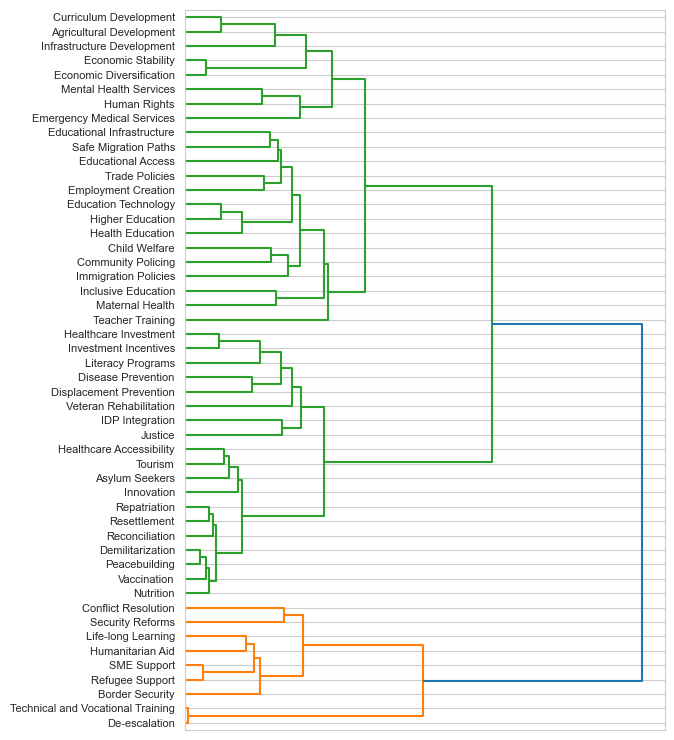

In [21]:
## Plot dendrogram

fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

plt.savefig('dendrogram.png', format='png', bbox_inches='tight')
plt.plot()

In [22]:
## Cutting the dendrogram at max_d
max_d = 0.41
# max_d = 0.2

[]

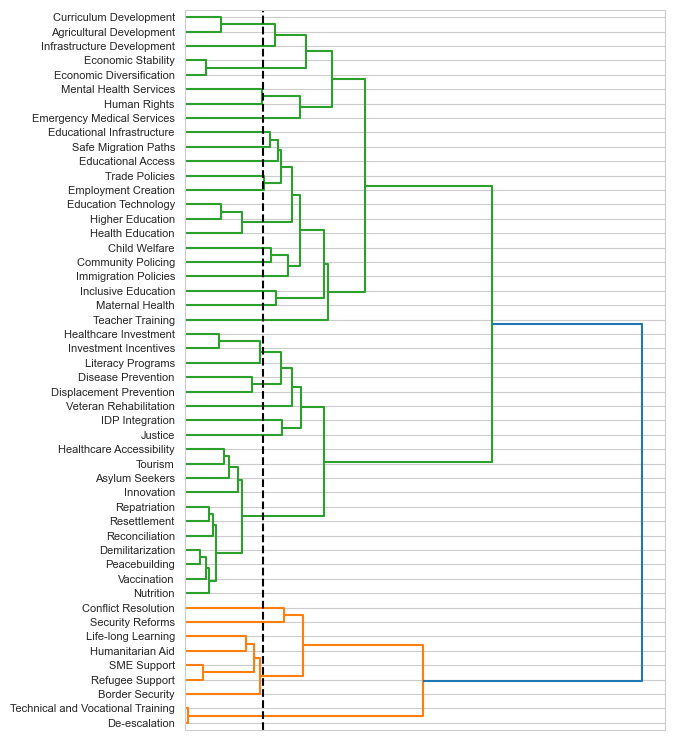

In [23]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_axes([0.1,0.1,0.4,0.6])

Z = sch.dendrogram(Y, orientation='right')
labels = df_summary.columns[Z['leaves']]
ax.set_xticks([])
ax.set_yticklabels(labels)

# Cutting the dendrogram at max_d
plt.axvline(x=max_d*D.max(), c='k', linestyle='--')

plt.plot()

In [24]:
## Identify clusters with max_d cut

lbs = sch.fcluster(Y, max_d*D.max(), 'distance')
clustr = lbs[Z['leaves']]

clust_skls = {}
for k in list(set(clustr)):
    clust_skls[k] = []

for j in range(len(labels)):
    clust_skls[clustr[j]].append(labels[j])

In [25]:
for key, value in clust_skls.items():
    print(key, value)

1 ['De-escalation', 'Technical and Vocational Training']
2 ['Border Security', 'Refugee Support', 'SME Support', 'Humanitarian Aid', 'Life-long Learning']
3 ['Security Reforms']
4 ['Conflict Resolution']
5 ['Nutrition', 'Vaccination', 'Peacebuilding', 'Demilitarization', 'Reconciliation', 'Resettlement', 'Repatriation', 'Innovation', 'Asylum Seekers', 'Tourism', 'Healthcare Accessibility']
6 ['Justice']
7 ['IDP Integration']
8 ['Displacement Prevention', 'Disease Prevention']
9 ['Literacy Programs', 'Investment Incentives', 'Healthcare Investment']
10 ['Veteran Rehabilitation']
11 ['Maternal Health']
12 ['Inclusive Education']
13 ['Community Policing']
14 ['Child Welfare']
15 ['Immigration Policies']
16 ['Health Education', 'Higher Education', 'Education Technology']
17 ['Employment Creation']
18 ['Trade Policies']
19 ['Safe Migration Paths']
20 ['Educational Infrastructure']
21 ['Educational Access']
22 ['Teacher Training']
23 ['Human Rights', 'Mental Health Services']
24 ['Emergency 

In [26]:
print("Number of automatically created clusters:",len(clust_skls))

Number of automatically created clusters: 27
